# Data Manipulation with Pandas

Pandas is the most widely used library of python for data science. It is incredibly helpful in manipulating the data so that you can derive better insights and build great machine learning models.

In this notebook, we will have a look at some of the intermediate concepts of working with pandas.


## Table of Contents

1. Sorting dataframes
2. Merging dataframes

### Loading dataset

***In this notebook we will use the Big Mart Sales Data. You can download the data from : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file*** 

In [1]:
import pandas as pd
import numpy as np

# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### 1. Sorting dataframes

Pandas data frame has two useful functions

- **sort_values()**: to sort pandas data frame by one or more columns
- **sort_index()**: to sort pandas data frame by row index

Each of these functions come with numerous options, like sorting the data frame in specific order (ascending or descending), sorting in place, sorting with missing values, sorting by specific algorithm etc.

Suppose you want to sort the dataframe by "Outlet_Establishment_Year" then you will use **sort_values**

## NOTICE WE ARE USING NAMED ARGUMENTS

In [2]:
# sort by year
sorted_data = data_BM.sort_values(by='Outlet_Establishment_Year')
# print sorted data
sorted_data[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2812,FDR60,14.30,Low Fat,0.130307,Baking Goods,75.7328,OUT013,1987,High,Tier 3,Supermarket Type1,617.8624
5938,NCJ06,20.10,Low Fat,0.034624,Household,118.9782,OUT013,1987,High,Tier 3,Supermarket Type1,1549.3166
3867,FDY38,13.60,Regular,0.119077,Dairy,231.2300,OUT013,1987,High,Tier 3,Supermarket Type1,2330.3000
1307,FDB37,20.25,Regular,0.022922,Baking Goods,240.7538,OUT013,1987,High,Tier 3,Supermarket Type1,3364.9532
5930,NCA18,10.10,Low Fat,0.056031,Household,115.1492,OUT013,1987,High,Tier 3,Supermarket Type1,1737.7380


- Now `sort_values` takes multiple options like:
    - `ascending`: The default sorting order is ascending, when you pass False here then it sorts in descending order.
    - `inplace`: whether to do inplace sorting or not

In [3]:
# sort in place and descending order
data_BM.sort_values(by='Outlet_Establishment_Year', ascending=False, inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2825,FDL16,12.85,Low Fat,0.169139,Frozen Foods,46.4060,OUT018,2009,Medium,Tier 3,Supermarket Type2,186.4240
7389,NCD42,16.50,Low Fat,0.012689,Health and Hygiene,39.7506,OUT018,2009,Medium,Tier 3,Supermarket Type2,227.7036
2165,DRJ39,20.25,Low Fat,0.036474,Dairy,218.3482,OUT018,2009,Medium,Tier 3,Supermarket Type2,2409.5302
2162,FDR60,14.30,Low Fat,0.130946,Baking Goods,76.7328,OUT018,2009,Medium,Tier 3,Supermarket Type2,1312.9576
2158,FDM58,16.85,Regular,0.080015,Snack Foods,111.8544,OUT018,2009,Medium,Tier 3,Supermarket Type2,1677.8160


You might want to sort a data frame based on the values of multiple columns. 
We can specify the columns we want to sort by as a list in the argument for sort_values().


In [4]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")

# sort by multiple columns
data_BM.sort_values(by=['Outlet_Establishment_Year', 'Item_Outlet_Sales'], ascending=False)[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
2803,FDU51,20.20,Regular,0.096907,Meat,175.5028,OUT018,2009,Medium,Tier 3,Supermarket Type2,6729.9064
641,FDY51,12.50,Low Fat,0.081465,Meat,220.7798,OUT018,2009,Medium,Tier 3,Supermarket Type2,6611.3940
2282,NCX30,16.70,Low Fat,0.026729,Household,248.4776,OUT018,2009,Medium,Tier 3,Supermarket Type2,6439.6176
2887,FDR25,17.00,Regular,0.140090,Canned,265.1884,OUT018,2009,Medium,Tier 3,Supermarket Type2,6359.7216


- Note that when sorting by multiple columns, pandas sort_value() uses the first variable first and second variable next. 
- We can see the difference by switching the order of column names in the list.

In [5]:
# changed the order of columns
data_BM.sort_values(by=['Item_Outlet_Sales', 'Outlet_Establishment_Year'], ascending=False, inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
6409,FDA21,13.650,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
4991,NCQ53,17.600,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
5752,FDI15,13.800,Low Fat,0.141326,Dairy,265.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,8479.6288


- We can use **sort_index()** to sort pandas dataframe to sort by row index or names. 
- In this example, row index are numbers and in the earlier example we sorted data frame by 'Item_Outlet_Sales', 'Outlet_Establishment_Year' and therefore the row index are jumbled up. 
- We can sort by row index (with inplace=True option) and retrieve the original dataframe.

## NOTICE WE ARE USING NAMED ARGUMENTS

In [6]:
# sort by index
data_BM.sort_index(inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### WATCH OUT FOR MUTATING YOUR DATAFRAMES INSTEAD OF "COPYING" THEM
### IF YOU MUTATE THE DATAFRAMES AND MAKE A MISTAKE YOU WILL HAVE TO RERUN ALL THE CODE THAT GOT THE DATAFRAME TO THE STATE IT WAS IN BEFORE THE MISTAKE

### 2. Merging dataframes

- Joining and merging DataFrames is the core process to start with data analysis and machine learning tasks. 
- It is one of the toolkits which every Data Analyst or Data Scientist should master because in almost all the cases data comes from multiple source and files.
- Pandas has two useful functions for merging dataframes:
    - **concat()**
    - **merge()** 
    
#### Creating dummy data

### NOTICE WE ARE MAKING DATAFRAMES FROM DICTIONARIES INSTEAD OF LISTS!
#### THE KEYS ARE THE COLUMNS AND THE VALUES ARE THE ROWS

In [7]:
# create dummy data



df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

### CONCAT CARES ABOUT INDEXES -- ITS NOT A JOIN

### a. concat() for combining dataframes
- Suppose you have the following three dataframes: df1, df2 and df3 and you want to combine them **"row-wise"** so that they become a single dataframe like the given image:
![](concat_1_a.png)
- You can use **concat()** here. You will have to pass the names of the DataFrames in a list as the argument to the concat(). 

In [8]:
# combine dataframes
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [9]:
# look what happens here
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

- the indicies from the original dataframes is carried over
- we can fix that

In [10]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

what if the the dataframes don't have the same column names?

In [11]:
df3_1 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
...                    columns=['letter', 'number', 'animal'])
df1_1 = pd.DataFrame([['a', 1], ['b', 2]],
...                    columns=['letter', 'number'])
pd.concat([df1_1, df3_1], sort=False)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


### they get filled with NaN -- `Not a Number`
### this is an OUTER JOIN  -- a UNION of all values

- pandas also provides you with an option to label the DataFrames, after the concatenation, with a key so that you may know which data came from which DataFrame.
- You can achieve the same by passing additional argument **keys** specifying the label names of the DataFrames in a list.

In [12]:
# combine dataframes
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

- Mentioning the keys also makes it easy to retrieve data corresponding to a particular DataFrame. 
- You can retrieve the data of DataFrame df2 which had the label `y` by using the `loc` method.

In [13]:
# get second dataframe
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


- When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following three ways:

    - Take the union of them all, `join='outer'`. This is the default option as it results in zero information loss.
    - Take the intersection, `join='inner'`.
    - Use a specific index, as passed to the `join_axes` argument.

- Here is an example of each of these methods. First, the default `join='outer'` behavior:
![](concat_2.png)

In [14]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                        'D': ['D2', 'D3', 'D6', 'D7'],
                        'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[2, 3, 6, 7])
    

result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


- Here is the same thing with `join='inner'`:
![](concat_3.png)

In [15]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- Lastly, suppose we just wanted to `reuse the exact index` from the original DataFrame:
![](concat_4.png)

In [18]:
# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
# result

### b. merge() for combining dataframes using SQL like joins

- Another ubiquitous operation related to DataFrames is the merging operation. 
- Two DataFrames might hold different kinds of information about the same entity and linked by some common feature/column.
- We can use **merge()** to combine such dataframes in pandas.

#### Creating dummy data

### MERGE CARES ABOUT COLUMN VALUES! MERGE WILL ALSO USE THE INDEX

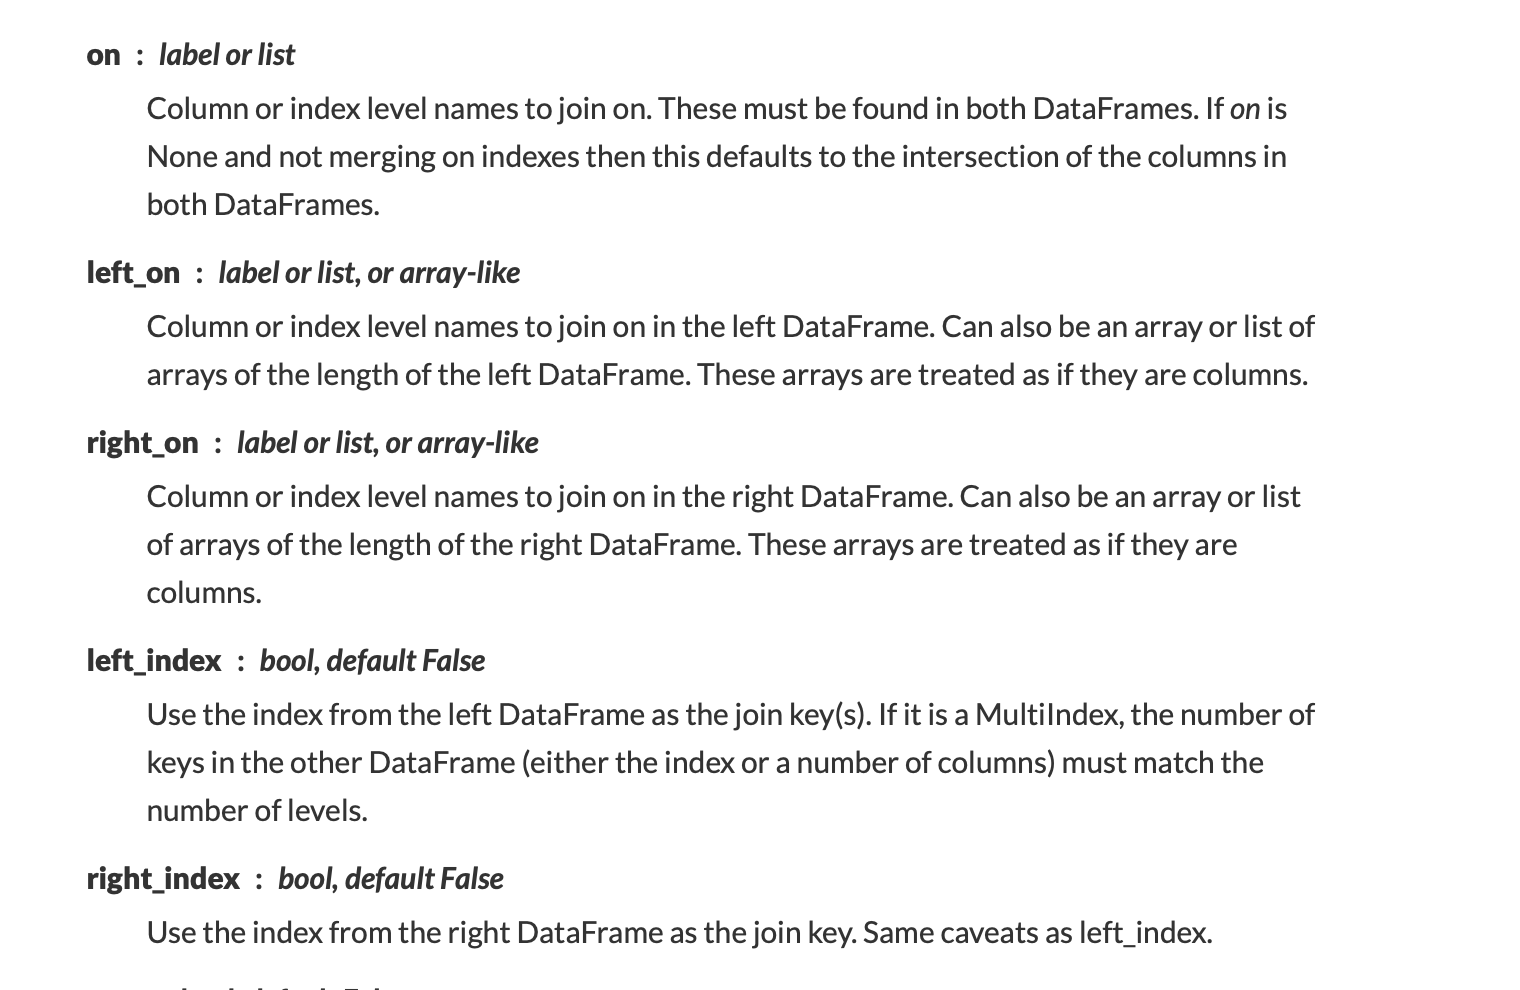

In [19]:
# create dummy data
df_a = pd.DataFrame({
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']})

df_b = pd.DataFrame({
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']})

df_c = pd.DataFrame({
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]})

Now these are our dataframes:
![](merge_4.png)

- Let's start with a basic join, we want to combine `df_a` with `df_c` based on the `subject_id` column.

In [26]:
pd.merge(df_a, df_c, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16


- Now that we have done a basic join, let's get into **some commmon SQL joins.**

#### Merge with outer join

- “Full outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.”
![](merge_8.png)


In [21]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


#### Merge with inner join

- “Inner join produces only the set of records that match in both Table A and Table B.”
![](merge_5.png)

In [22]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


#### Merge with right join

- “Right outer join produces a complete set of records from Table B, with the matching records (where available) in Table A. If there is no match, the left side will contain null.”

![](merge_7.png)

In [23]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


#### Merge with left join

- “Left outer join produces a complete set of records from Table A, with the matching records (where available) in Table B. If there is no match, the right side will contain null.”
![](merge_6.png)

In [24]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Merge OR Concat : Which to use when?

1. After learning both of the functions in detail, chances are that you might be confused which to use when. 
2. One major difference is that `merge()` is used to combine dataframes on the basis of values of **common columns**. While`concat()` is used to **append dataframes** one below the other (or sideways, depending on whether the axis option is set to 0 or 1).
3. Exact usage depends upon the kind of data you have and analysis you want to perform.